# Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import StandardScaler

# Load Data

In [4]:
#File Paths
train_path = '/Users/gracegomes/Desktop/archive-7/train.csv'
test_path = '/Users/gracegomes/Desktop/archive-7/test.csv'

In [7]:
# Load data
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Initial Data Exploration

In [10]:
print("\n First 5 Rows:")
print(train_df.head())


 First 5 Rows:
   enrollee_id      city  city_development_index gender  \
0         8949  city_103                   0.920   Male   
1        29725   city_40                   0.776   Male   
2        11561   city_21                   0.624    NaN   
3        33241  city_115                   0.789    NaN   
4          666  city_162                   0.767   Male   

       relevent_experience enrolled_university education_level  \
0  Has relevent experience       no_enrollment        Graduate   
1   No relevent experience       no_enrollment        Graduate   
2   No relevent experience    Full time course        Graduate   
3   No relevent experience                 NaN        Graduate   
4  Has relevent experience       no_enrollment         Masters   

  major_discipline experience company_size    company_type last_new_job  \
0             STEM        >20          NaN             NaN            1   
1             STEM         15        50-99         Pvt Ltd           >4   
2      

In [12]:
print("Dataset Dimensions:")
print(f"Train: {train_df.shape}, Test: {test_df.shape}\n")

Dataset Dimensions:
Train: (19158, 14), Test: (2129, 13)



### Checking For Missing Values

In [15]:
print("Data Types & Missing Values (Train):")
print(train_df.info())

Data Types & Missing Values (Train):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes

### Checking For Outliers

In [18]:
#Checking numerical columns
numerical_cols_to_plot = [
    'city_development_index',
    'training_hours'
]

#### Boxplot For Visualisation

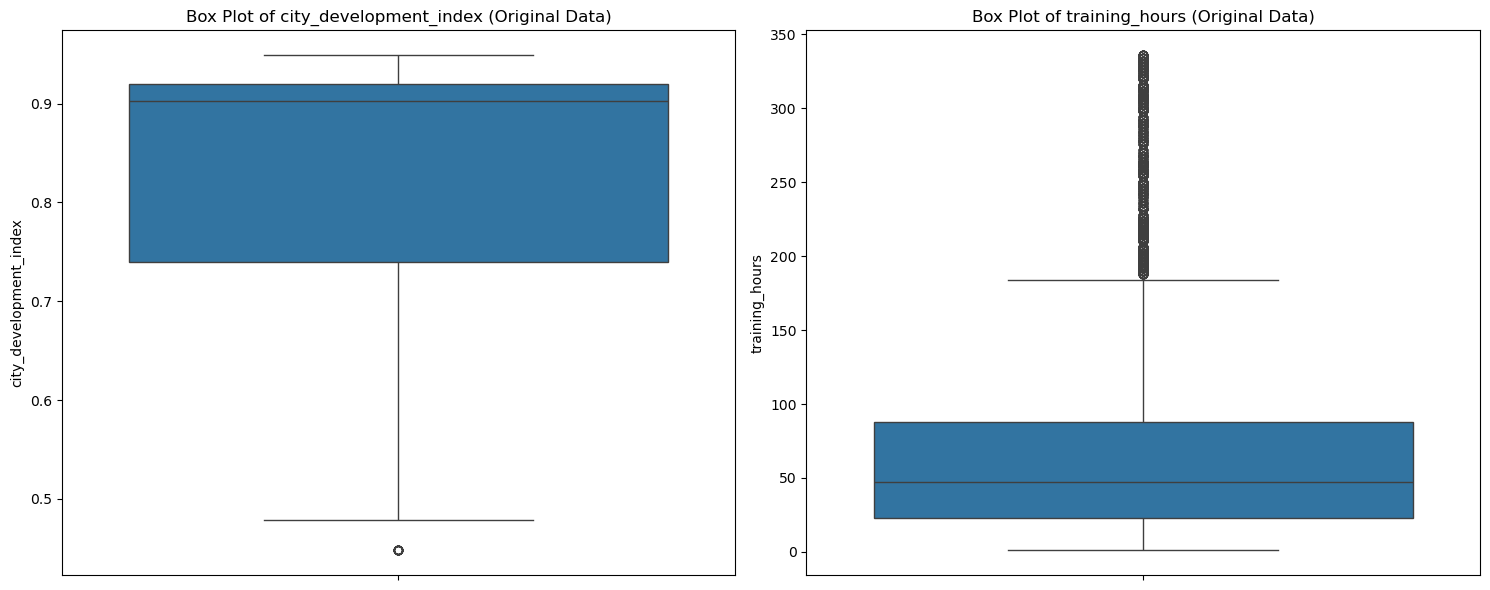

In [21]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(1, len(numerical_cols_to_plot), i + 1)
    # Use train_df here instead of train_df_processed
    sns.boxplot(y=train_df[col])
    plt.title(f'Box Plot of {col} (Original Data)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

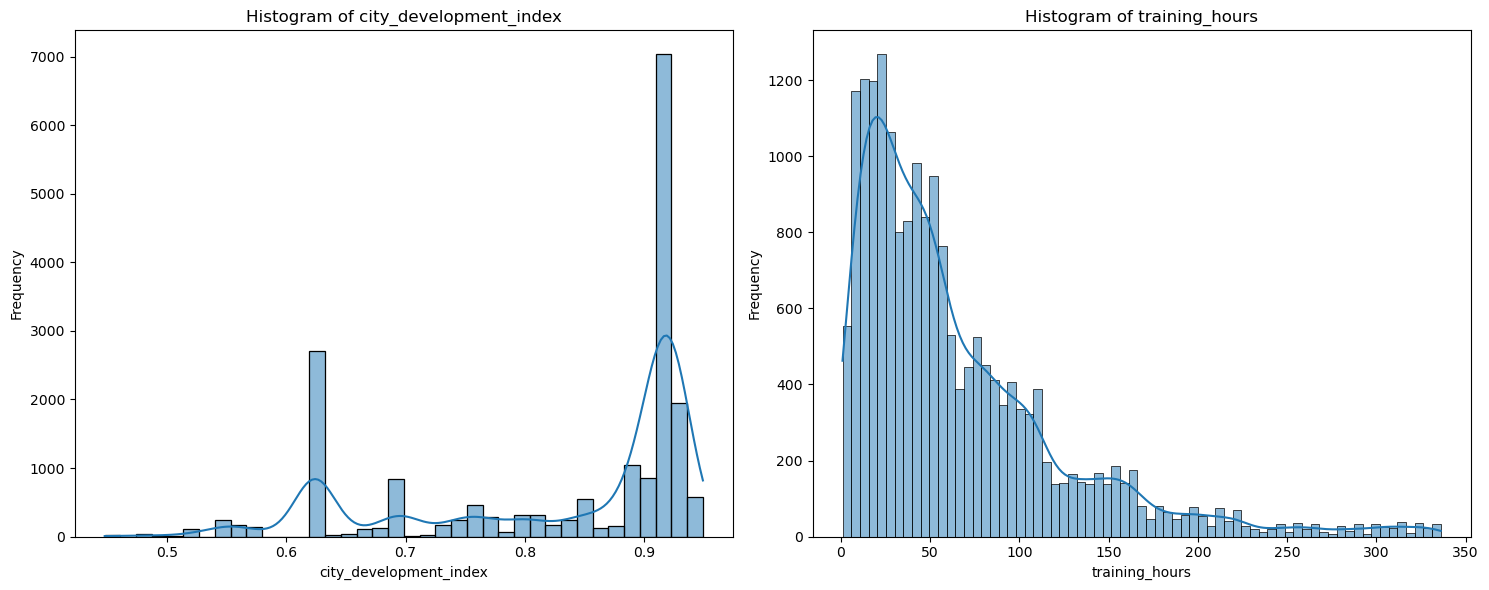

In [23]:
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_cols_to_plot):
    plt.subplot(1, len(numerical_cols_to_plot), i + 1)
    sns.histplot(train_df[col], kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


In [142]:
#Checking for outliers in categorical columns
print("Unique values for 'object' type columns:")
for col in categorical_cols in categorical_cols_object:
    print(f"\nColumn: {col}")
    print(df[col].unique())

Unique values for 'object' type columns:


NameError: name 'categorical_cols_object' is not defined

### Class Imbalance

Target Distribution:
target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64


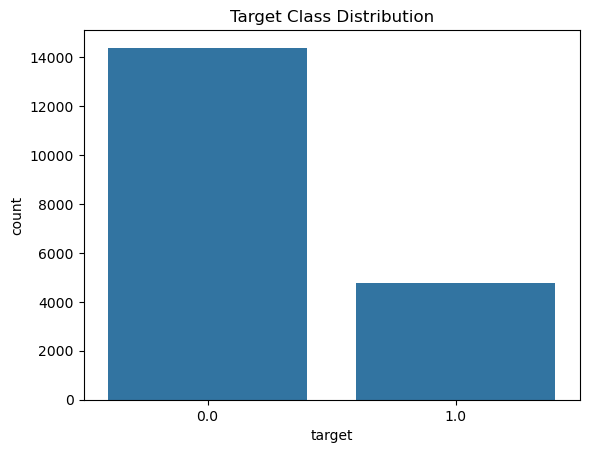

In [26]:
print("Target Distribution:")
print(train_df['target'].value_counts(normalize=True))

# Visualize target imbalance
sns.countplot(x='target', data=train_df)
plt.title("Target Class Distribution")
plt.show()


In [28]:
# Summary for numeric features
print("\n Summary Statistics (Numeric):")
print(train_df.describe())


 Summary Statistics (Numeric):
        enrollee_id  city_development_index  training_hours        target
count  19158.000000            19158.000000    19158.000000  19158.000000
mean   16875.358179                0.828848       65.366896      0.249348
std     9616.292592                0.123362       60.058462      0.432647
min        1.000000                0.448000        1.000000      0.000000
25%     8554.250000                0.740000       23.000000      0.000000
50%    16982.500000                0.903000       47.000000      0.000000
75%    25169.750000                0.920000       88.000000      0.000000
max    33380.000000                0.949000      336.000000      1.000000


In [30]:
# Unique values in categorical columns
categorical_cols = train_df.select_dtypes(include='object').columns
print("Categorical Feature Cardinality:")
for col in categorical_cols:
    print(f"{col}: {train_df[col].nunique()} unique values")

Categorical Feature Cardinality:
city: 123 unique values
gender: 3 unique values
relevent_experience: 2 unique values
enrolled_university: 3 unique values
education_level: 5 unique values
major_discipline: 6 unique values
experience: 22 unique values
company_size: 8 unique values
company_type: 6 unique values
last_new_job: 6 unique values


# Data Pre-Processing

In [33]:
#Copy of Dataset
train_df_processed = train_df.copy()
test_df_processed = test_df.copy()

## Drop Columns

In [36]:
# Drop enrollee_id as it's just an identifier
train_df_processed = train_df_processed.drop('enrollee_id', axis=1)
test_df_processed = test_df_processed.drop('enrollee_id', axis=1)

## Handle Missing Values

### Numerical Columns

##### Mapping

In [41]:
#Ordinal Mapping & Imputation for numerical columns
experience_map = {
    '<1': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8,
    '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15,
    '16': 16, '17': 17, '18': 18, '19': 19, '20': 20, '>20': 21
}

last_new_job_map = {
    'never': 0, '1': 1, '2': 2, '3': 3, '4': 4, '>4': 5
}

company_size_map = {
    '<10': 5,          # Midpoint or a reasonable small value
    '10/49': 30,       # Midpoint
    '50-99': 75,       # Midpoint
    '100-500': 300,    # Midpoint
    '500-999': 750,    # Midpoint
    '1000-4999': 3000, # Midpoint
    '5000-9999': 7500, # Midpoint
    '10000+': 15000    # Arbitrary large value to represent 'very large'
}


#### Debugging Mapping

In [44]:
print("Unique 'experience' (Train):", train_df_processed['experience'].unique())
print("Unique 'last_new_job' (Train):", train_df_processed['last_new_job'].unique())
print("Unique 'company_size' (Train):", train_df_processed['company_size'].unique())

Unique 'experience' (Train): ['>20' '15' '5' '<1' '11' '13' '7' '17' '2' '16' '1' '4' '10' '14' '18'
 '19' '12' '3' '6' '9' '8' '20' nan]
Unique 'last_new_job' (Train): ['1' '>4' 'never' '4' '3' '2' nan]
Unique 'company_size' (Train): [nan '50-99' '<10' '10000+' '5000-9999' '1000-4999' '10/49' '100-500'
 '500-999']


#### Mapping Application

In [47]:
#Apply Mapping
train_df_processed['experience'] = train_df_processed['experience'].map(experience_map)
test_df_processed['experience'] = test_df_processed['experience'].map(experience_map)

train_df_processed['last_new_job'] = train_df_processed['last_new_job'].map(last_new_job_map)
test_df_processed['last_new_job'] = test_df_processed['last_new_job'].map(last_new_job_map)

train_df_processed['company_size'] = train_df_processed['company_size'].map(company_size_map)
test_df_processed['company_size'] = test_df_processed['company_size'].map(company_size_map)

#### Debugging Afer Mapping

In [50]:
print("Missing 'experience' (Train):", train_df_processed['experience'].isnull().sum())
print("Missing 'last_new_job' (Train):", train_df_processed['last_new_job'].isnull().sum())
print("Missing 'company_size' (Train):", train_df_processed['company_size'].isnull().sum())
print("Dtype 'experience' (Train):", train_df_processed['experience'].dtype) 
print("Dtype 'last_new_job' (Train):", train_df_processed['last_new_job'].dtype) 
print("Dtype 'company_size' (Train):", train_df_processed['company_size'].dtype)

Missing 'experience' (Train): 65
Missing 'last_new_job' (Train): 423
Missing 'company_size' (Train): 5938
Dtype 'experience' (Train): float64
Dtype 'last_new_job' (Train): float64
Dtype 'company_size' (Train): float64


#### Calculate Median

In [53]:
median_experience = train_df_processed['experience'].median()
median_last_new_job = train_df_processed['last_new_job'].median()
median_company_size = train_df_processed['company_size'].median() 

#### Impute Missing Values Using Median

In [56]:
train_df_processed['experience'] = train_df_processed['experience'].fillna(median_experience)
test_df_processed['experience'] = test_df_processed['experience'].fillna(median_experience)

train_df_processed['last_new_job'] = train_df_processed['last_new_job'].fillna(median_last_new_job)
test_df_processed['last_new_job'] = test_df_processed['last_new_job'].fillna(median_last_new_job)

train_df_processed['company_size'] = train_df_processed['company_size'].fillna(median_company_size)
test_df_processed['company_size'] = test_df_processed['company_size'].fillna(median_company_size)

#### Check For Missing Values & Data Types In Numerical Columns

In [59]:
print("\n--- After Ordinal Mapping & Imputation for 'experience', 'last_new_job', and 'company_size' ---")
print("Missing values for 'experience' (Train):", train_df_processed['experience'].isnull().sum())
print("Missing values for 'last_new_job' (Train):", train_df_processed['last_new_job'].isnull().sum())
print("Missing values for 'company_size' (Train):", train_df_processed['company_size'].isnull().sum())
print("Missing values for 'experience' (Test):", test_df_processed['experience'].isnull().sum())
print("Missing values for 'last_new_job' (Test):", test_df_processed['last_new_job'].isnull().sum())
print("Missing values for 'company_size' (Test):", test_df_processed['company_size'].isnull().sum()) 
print("Experience dtype:", train_df_processed['experience'].dtype)
print("Last New Job dtype:", train_df_processed['last_new_job'].dtype)
print("Company Size dtype:", train_df_processed['company_size'].dtype)


--- After Ordinal Mapping & Imputation for 'experience', 'last_new_job', and 'company_size' ---
Missing values for 'experience' (Train): 0
Missing values for 'last_new_job' (Train): 0
Missing values for 'company_size' (Train): 0
Missing values for 'experience' (Test): 0
Missing values for 'last_new_job' (Test): 0
Missing values for 'company_size' (Test): 0
Experience dtype: float64
Last New Job dtype: float64
Company Size dtype: float64


### Categorical Columns

In [62]:
categorical_cols_to_impute_mode = [
    'gender',
    'enrolled_university',
    'education_level',
    'major_discipline',
    'company_type'
]

#### Mode Imputation

In [65]:
for col in categorical_cols_to_impute_mode:
    if train_df_processed[col].isnull().any(): # Only impute if there are actually NaNs
        mode_value = train_df_processed[col].mode()[0]
        train_df_processed[col] = train_df_processed[col].fillna(mode_value)
        test_df_processed[col] = test_df_processed[col].fillna(mode_value)
        print(f"Filled missing values for '{col}' with mode: '{mode_value}'")
    else:
        print(f"No missing values in '{col}'. Skipping imputation.")

Filled missing values for 'gender' with mode: 'Male'
Filled missing values for 'enrolled_university' with mode: 'no_enrollment'
Filled missing values for 'education_level' with mode: 'Graduate'
Filled missing values for 'major_discipline' with mode: 'STEM'
Filled missing values for 'company_type' with mode: 'Pvt Ltd'


#### View Categorical Columns

In [68]:
print("\n--- Missing values after all categorical imputation (Train) ---")
print(train_df_processed.isnull().sum())
print("\n--- Missing values after all categorical imputation (Test) ---")
print(test_df_processed.isnull().sum())


--- Missing values after all categorical imputation (Train) ---
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

--- Missing values after all categorical imputation (Test) ---
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64


In [70]:
# Separate features (X) and target (y) for model training
X_train = train_df_processed.drop('target', axis=1)
y_train = train_df_processed['target']
X_test = test_df_processed

print(f"\nData ready for modeling: X_train.shape={X_train.shape}, y_train.shape={y_train.shape}, X_test.shape={X_test.shape}")


Data ready for modeling: X_train.shape=(19158, 12), y_train.shape=(19158,), X_test.shape=(2129, 12)


## Handling Outliers

In [73]:
numerical_cols_for_outliers = [
    'city_development_index',
    'training_hours',
    'experience',
    'last_new_job',
    'company_size'
]

In [75]:
for col in numerical_cols_for_outliers:
    # Calculate Q1, Q3, and IQR from the training data only to prevent data leakage
    Q1 = train_df_processed[col].quantile(0.01) # Using 1st percentile
    Q3 = train_df_processed[col].quantile(0.99) # Using 99th percentile
    
    # Calculate IQR based on these percentiles
    IQR = Q3 - Q1

In [77]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [79]:
# Capping outliers in training data
train_df_processed.loc[train_df_processed[col] < lower_bound, col] = lower_bound
train_df_processed.loc[train_df_processed[col] > upper_bound, col] = upper_bound

# Capping outliers in test data using bounds derived from training data
test_df_processed.loc[test_df_processed[col] < lower_bound, col] = lower_bound
test_df_processed.loc[test_df_processed[col] > upper_bound, col] = upper_bound


In [81]:
print("Missing values after outlier treatment (Train):", train_df_processed.isnull().sum().sum())
print("Missing values after outlier treatment (Test):", test_df_processed.isnull().sum().sum())

Missing values after outlier treatment (Train): 0
Missing values after outlier treatment (Test): 0



--- Visualizing Outliers (ALL Numerical Data: AFTER Outlier Treatment) ---


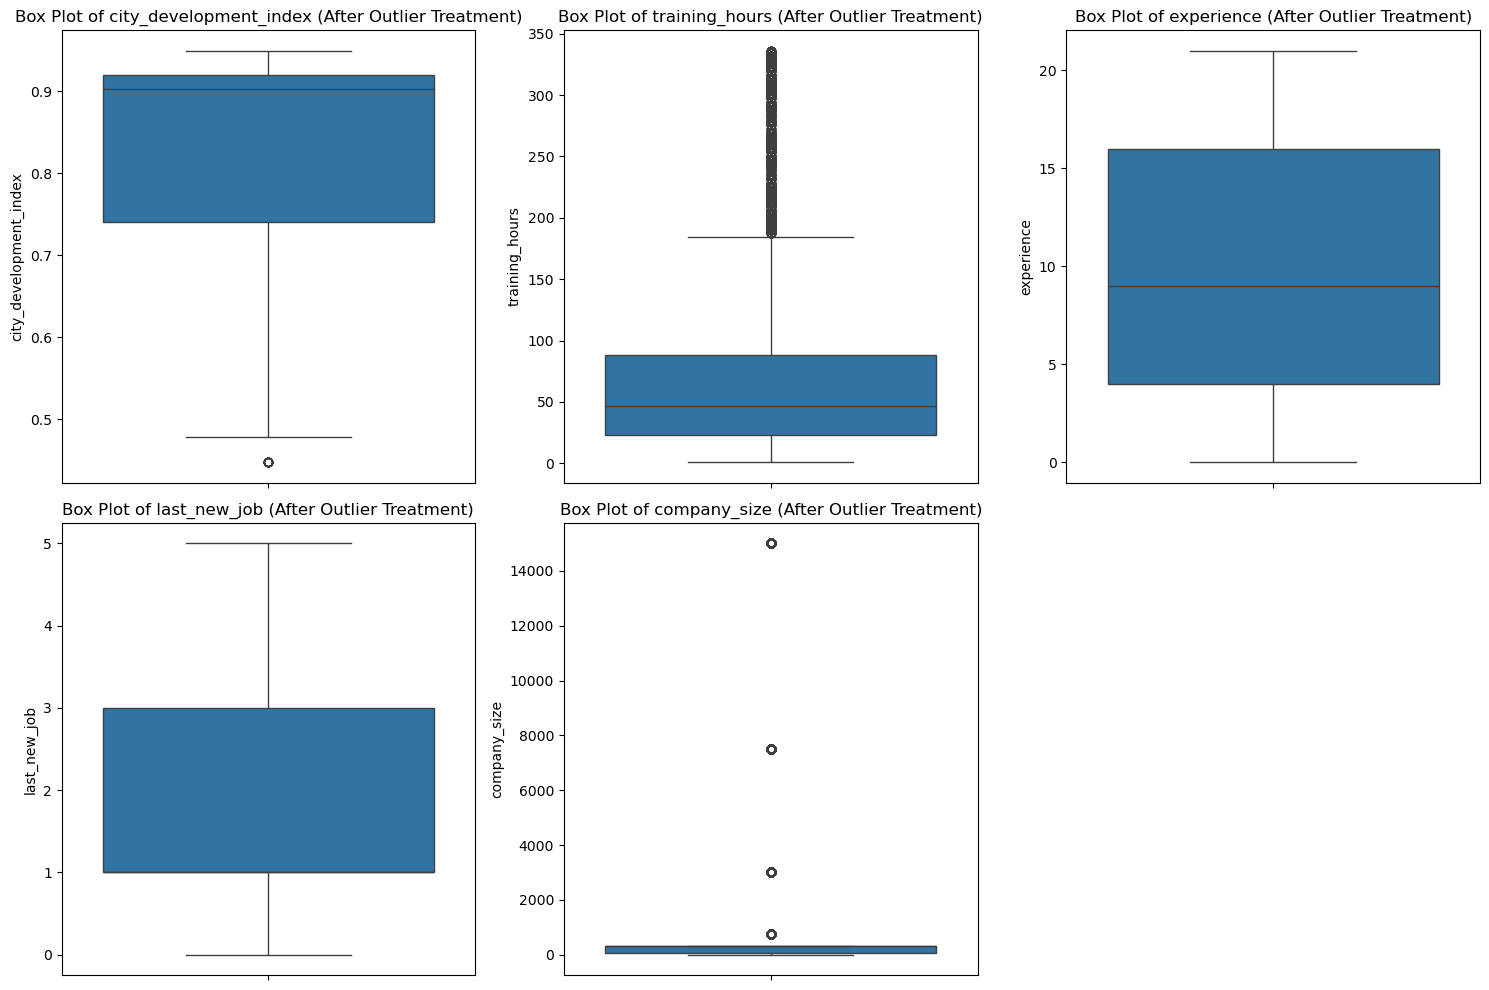

In [83]:
#Outlier Visualisation
print("\n--- Visualizing Outliers (ALL Numerical Data: AFTER Outlier Treatment) ---")
plt.figure(figsize=(15, 10)) # Adjust figure size for 5 plots
for i, col in enumerate(numerical_cols_for_outliers): # Use the same list of 5 columns
    plt.subplot(2, 3, i + 1) # 2 rows, 3 columns subplot layout
    sns.boxplot(y=train_df_processed[col])
    plt.title(f'Box Plot of {col} (After Outlier Treatment)')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

## One-Hot Encoding

In [86]:
categorical_cols_for_ohe = train_df_processed.select_dtypes(include='object').columns.tolist()
print(f"\n--- One-Hot Encoding the following columns: {categorical_cols_for_ohe} ---")


--- One-Hot Encoding the following columns: ['city', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'company_type'] ---


In [88]:
X_train_pre_ohe = train_df_processed.drop('target', axis=1)
y_train = train_df_processed['target']
X_test_pre_ohe = test_df_processed.copy()

In [90]:
X_train_ohe = pd.get_dummies(X_train_pre_ohe, columns=categorical_cols_for_ohe, drop_first=True)
X_test_ohe = pd.get_dummies(X_test_pre_ohe, columns=categorical_cols_for_ohe, drop_first=True)

In [92]:
train_cols = X_train_ohe.columns

In [94]:
X_test_aligned = X_test_ohe.reindex(columns=train_cols, fill_value=0)

In [96]:
train_df_processed = X_train_ohe 
test_df_processed = X_test_aligned 

In [98]:
print("\n--- After One-Hot Encoding (REVISED) ---")
print("Shape after One-Hot Encoding (Train Features):", train_df_processed.shape)
print("Shape after One-Hot Encoding (Test Features):", test_df_processed.shape)
print("Columns in Train Features (first 10):", train_df_processed.columns[:10].tolist())
print("Columns in Test Features (first 10):", test_df_processed.columns[:10].tolist())
# Verify column equality
print("Do train and test features have the same columns?", (train_df_processed.columns.tolist() == test_df_processed.columns.tolist()))


--- After One-Hot Encoding (REVISED) ---
Shape after One-Hot Encoding (Train Features): (19158, 146)
Shape after One-Hot Encoding (Test Features): (2129, 146)
Columns in Train Features (first 10): ['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103']
Columns in Test Features (first 10): ['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103']
Do train and test features have the same columns? True


## Feature Scaling (Standardization)

In [101]:
numerical_features_for_scaling = train_df_processed.select_dtypes(include=[np.number, bool]).columns.tolist()

In [103]:
print(f"\n--- Scaling the following numerical columns: {len(numerical_features_for_scaling)} columns selected ---")
print(f"--- First 10 selected: {numerical_features_for_scaling[:10]} ---")


--- Scaling the following numerical columns: 146 columns selected ---
--- First 10 selected: ['city_development_index', 'experience', 'company_size', 'last_new_job', 'training_hours', 'city_city_10', 'city_city_100', 'city_city_101', 'city_city_102', 'city_city_103'] ---


In [105]:
scaler = StandardScaler()

In [107]:
#Applying Scaling
train_df_processed[numerical_features_for_scaling] = scaler.fit_transform(train_df_processed[numerical_features_for_scaling])
test_df_processed[numerical_features_for_scaling] = scaler.transform(test_df_processed[numerical_features_for_scaling])

print("\n--- Preprocessing Complete ---")
print("Final Train Data Head:")
print(train_df_processed.head())
print("\nFinal Test Data Head:")
print(test_df_processed.head())
print(f"Final Train Shape: {train_df_processed.shape}, Final Test Shape: {test_df_processed.shape}")
print("All missing values in Train:", train_df_processed.isnull().sum().sum())
print("All missing values in Test:", test_df_processed.isnull().sum().sum())

In [110]:
X_train = train_df_processed  
X_test = test_df_processed 

In [112]:
print(f"\nData ready for modeling: X_train.shape={X_train.shape}, y_train.shape={y_train.shape}, X_test.shape={X_test.shape}")


Data ready for modeling: X_train.shape=(19158, 146), y_train.shape=(19158,), X_test.shape=(2129, 146)


## Handling Class Imbalance - SMOTE

In [115]:
print("\n--- Handling Class Imbalance with SMOTE ---")
print(f"Original X_train shape: {X_train.shape}")
print(f"Original y_train distribution:\n{y_train.value_counts(normalize=True)}")

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print(f"\nResampled X_train shape: {X_train_res.shape}")
print(f"Resampled y_train distribution:\n{y_train_res.value_counts(normalize=True)}")


--- Handling Class Imbalance with SMOTE ---
Original X_train shape: (19158, 146)
Original y_train distribution:
target
0.0    0.750652
1.0    0.249348
Name: proportion, dtype: float64

Resampled X_train shape: (28762, 146)
Resampled y_train distribution:
target
1.0    0.5
0.0    0.5
Name: proportion, dtype: float64


# Model Building

In [118]:
#Imports
!pip install lightgbm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc # For evaluation metrics
import lightgbm as lgb 
import warnings 

In [119]:
## Model Setup

In [120]:
# Define a dictionary of models to train and their initial parameters
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest Classifier': RandomForestClassifier(random_state=42),
    'LightGBM Classifier': lgb.LGBMClassifier(random_state=42)
}

# Define hyperparameter grids for GridSearchCV for each model
param_grids = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2']
    },
    'Random Forest Classifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    'LightGBM Classifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1],
        'num_leaves': [20, 31, 40],
        'max_depth': [-1, 10, 20]
    }
}

# Dictionary to store best models and their performance
best_models = {}
model_performance = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'])

In [121]:
## Model Training & Evaluation Function

In [122]:
def train_and_evaluate_model(name, model, param_grid, X_train_res, y_train_res, X_test, X_train_original_data, y_train_original_target, best_models_store, model_performance_store):
    print(f"\n--- Training and Evaluating {name} ---")

    # Use GridSearchCV for hyperparameter tuning with 5-fold cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5,
                               scoring='roc_auc', n_jobs=-1, verbose=1)

    grid_search.fit(X_train_res, y_train_res)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print(f"Best parameters for {name}: {best_params}")
    print(f"Best cross-validation ROC AUC for {name}: {best_score:.4f}")

    # Store the best model in the provided dictionary
    best_models_store[name] = best_model

    # Evaluate on the original (unbalanced) training set for comparison
    y_train_pred = best_model.predict(X_train_original_data) # Using the original X_train (unresampled)
    y_train_proba = best_model.predict_proba(X_train_original_data)[:, 1]

    print(f"\nEvaluation on original TRAINING data for {name}:")
    print(f"  Accuracy: {accuracy_score(y_train_original_target, y_train_pred):.4f}")
    print(f"  Precision: {precision_score(y_train_original_target, y_train_pred):.4f}")
    print(f"  Recall: {recall_score(y_train_original_target, y_train_pred):.4f}")
    print(f"  F1-Score: {f1_score(y_train_original_target, y_train_pred):.4f}")
    print(f"  ROC AUC: {roc_auc_score(y_train_original_target, y_train_proba):.4f}")

    # Calculate PR AUC for training data
    precision_val, recall_val, _ = precision_recall_curve(y_train_original_target, y_train_proba)
    pr_auc_val = auc(recall_val, precision_val)
    print(f"  PR AUC: {pr_auc_val:.4f}")

    # Make predictions on the test set (probabilities) - Note: You may want to store this if needed later
    # For now, it's just printed, not saved to a global list.
    y_test_proba = best_model.predict_proba(X_test)[:, 1] # Probability of positive class
    print(f"\nGenerated test set probabilities for {name}. First 5: {y_test_proba[:5]}")


    # Store performance metrics for reporting in the provided DataFrame
    model_performance_store.loc[len(model_performance_store)] = [
        name,
        accuracy_score(y_train_original_target, y_train_pred),
        precision_score(y_train_original_target, y_train_pred),
        recall_score(y_train_original_target, y_train_pred),
        f1_score(y_train_original_target, y_train_pred),
        roc_auc_score(y_train_original_target, y_train_proba),
        pr_auc_val
    ]

In [123]:
## Model Training 

In [130]:
for name, model in models.items():
    # Pass the global best_models and model_performance to the function
    train_and_evaluate_model(name, model, param_grids[name], X_train_res, y_train_res, X_test, X_train, y_train, best_models, model_performance)

print("\n--- All Models Trained and Evaluated ---")
print("\n--- Model Performance Summary (on original training data) ---")
print(model_performance.round(4))

print("\nModel building section complete. You can now analyze the model_performance DataFrame.")


--- Training and Evaluating Logistic Regression ---
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for Logistic Regression: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation ROC AUC for Logistic Regression: 0.7809

Evaluation on original TRAINING data for Logistic Regression:
  Accuracy: 0.7438
  Precision: 0.4898
  Recall: 0.6575
  F1-Score: 0.5614
  ROC AUC: 0.7738
  PR AUC: 0.5148

Generated test set probabilities for Logistic Regression. First 5: [0.5532863  0.47829319 0.80299274 0.26212278 0.28199558]

--- Training and Evaluating Random Forest Classifier ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for Random Forest Classifier: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Best cross-validation ROC AUC for Random Forest Classifier: 0.9227

Evaluation on original TRAINING data for Random Forest Classifier:
  Accuracy: 0.9975
  Precision: 0.9950
  Recall: 0.9950
  F1-Score: 0.9950
  ROC AUC: 1.000

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14381, number of negative: 14381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006831 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3156
[LightGBM] [Info] Number of data points in the train set: 28762, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LightGBM Classifier: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 300, 'num_leaves': 40}
Best cross-validation ROC AUC for LightGBM Classifier: 0.9227

Evaluation on original TRAINING data for LightGBM Classifier:
  Accuracy: 0.8159
  Precision: 0.6271
  Recall: 0.6456
  F1-Score: 0.6362
  ROC AUC: 0.8728
  PR AUC: 0.6936

Generated test set probabilities for LightGBM Classifier. F

## Refined Model

In [137]:
models_refined = {
    'Logistic Regression_Refined': LogisticRegression(random_state=42, solver='liblinear'),
    'Random Forest Classifier_Refined': RandomForestClassifier(random_state=42),
    'LightGBM Classifier_Refined': lgb.LGBMClassifier(random_state=42)
}

In [139]:
param_grids_refined = {
    'Logistic Regression_Refined': {
        'C': [0.05, 0.1, 0.5, 1, 5, 10],
        'penalty': ['l1', 'l2']
    },
    'Random Forest Classifier_Refined': {
        'n_estimators': [200, 300, 400],
        'max_depth': [8, 12, 15, 20],
        'min_samples_split': [10, 20, 30],
        'min_samples_leaf': [5, 10, 15]
    },
    'LightGBM Classifier_Refined': {
        'n_estimators': [300, 400, 500],
        'learning_rate': [0.03, 0.05, 0.07],
        'num_leaves': [25, 31, 35, 45],
        'max_depth': [10, 15, 20, -1],
        'reg_alpha': [0.0, 0.1, 0.5],
        'reg_lambda': [0.0, 0.1, 0.5]
    }
}

best_models_refined = {}
model_performance_refined = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC', 'PR AUC'])

In [141]:
for name, model in models_refined.items():
    train_and_evaluate_model(name, model, param_grids_refined[name], X_train_res, y_train_res, X_test, X_train, y_train, best_models_refined, model_performance_refined)

print("\n--- All REFINED Models Trained and Evaluated ---")
print("\n--- Refined Model Performance Summary (on original training data) ---")
print(model_performance_refined.round(4))


--- Training and Evaluating Logistic Regression_Refined ---
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for Logistic Regression_Refined: {'C': 0.05, 'penalty': 'l1'}
Best cross-validation ROC AUC for Logistic Regression_Refined: 0.7812

Evaluation on original TRAINING data for Logistic Regression_Refined:
  Accuracy: 0.7449
  Precision: 0.4914
  Recall: 0.6565
  F1-Score: 0.5621
  ROC AUC: 0.7739
  PR AUC: 0.5149

Generated test set probabilities for Logistic Regression_Refined. First 5: [0.54467865 0.47689605 0.80295445 0.27148593 0.28316888]

--- Training and Evaluating Random Forest Classifier_Refined ---
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest Classifier_Refined: {'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation ROC AUC for Random Forest Classifier_Refined: 0.8749

Evaluation on original TRAINING data for Random Forest Classifier_Refi

/opt/anaconda3/lib/python3.12/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 14381, number of negative: 14381
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.008848 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3156
[LightGBM] [Info] Number of data points in the train set: 28762, number of used features: 114
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best parameters for LightGBM Classifier_Refined: {'learning_rate': 0.05, 'max_depth': -1, 'n_estimators': 500, 'num_leaves': 45, 'reg_alpha': 0.5, 'reg_lambda': 0.5}
Best cross-validation ROC AUC for LightGBM Classifier_Refined: 0.9238

Evaluation on original TRAINING data for LightGBM Classifier_Refined:
  Accuracy: 0.8439
  Precision: 0.6924
  Recall: 0.6728
  F1-Score: 0.6825
  ROC AUC: 0.9053
  PR AUC: 0.7683

Generated test set probabilities for LightGBM Classifier_Refin